In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Emotion Recognition Project from Audio - Speech**


In [4]:
import pandas as pd
import numpy as np
import librosa
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')

In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 12162:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
len(paths)

12162

In [7]:
paths[:5]

['/kaggle/input/speech-emotion-recognition-en/Savee/JE_h09.wav',
 '/kaggle/input/speech-emotion-recognition-en/Savee/KL_f12.wav',
 '/kaggle/input/speech-emotion-recognition-en/Savee/DC_h03.wav',
 '/kaggle/input/speech-emotion-recognition-en/Savee/DC_d04.wav',
 '/kaggle/input/speech-emotion-recognition-en/Savee/KL_a14.wav']

In [8]:
labels[:6]

['h09', 'f12', 'h03', 'd04', 'a14', 'f01']

In [9]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech label
0  /kaggle/input/speech-emotion-recognition-en/Sa...   h09
1  /kaggle/input/speech-emotion-recognition-en/Sa...   f12
2  /kaggle/input/speech-emotion-recognition-en/Sa...   h03
3  /kaggle/input/speech-emotion-recognition-en/Sa...   d04
4  /kaggle/input/speech-emotion-recognition-en/Sa...   a14

In [10]:
df['label'].value_counts()

label
xx                      6076
lo                       455
hi                       455
md                       455
angry                    400
                        ... 
03-01-02-01-01-01-20       1
03-01-06-02-02-02-20       1
03-01-04-01-02-02-20       1
03-01-07-02-01-01-20       1
03-01-05-01-02-02-12       1
Name: count, Length: 1572, dtype: int64

**Exploratory Data Analysis**

<Axes: xlabel='label', ylabel='count'>

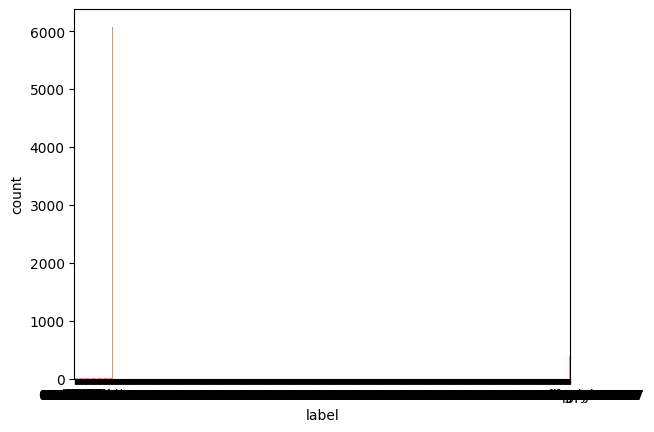

In [11]:
sns.countplot(data=df, x='label')

In [21]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion.capitalize(), size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
# Define spectrogram function
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion.capitalize(), size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

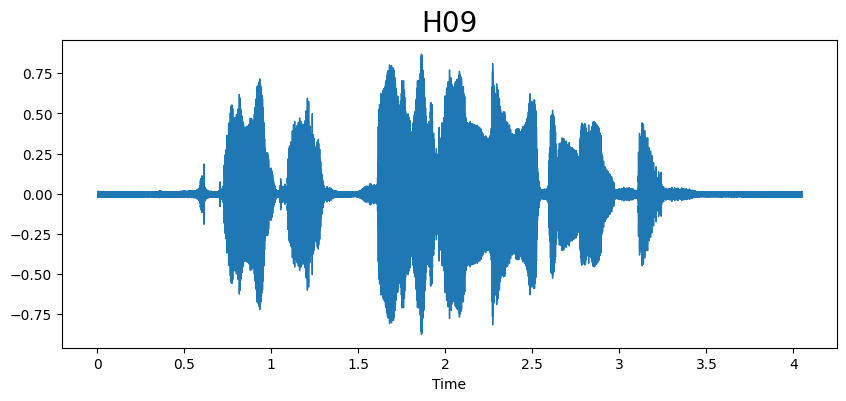

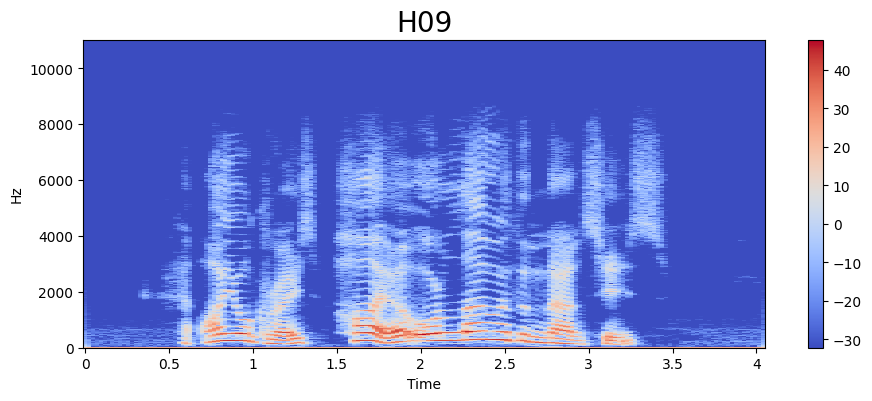

In [22]:
emotion = 'h09'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

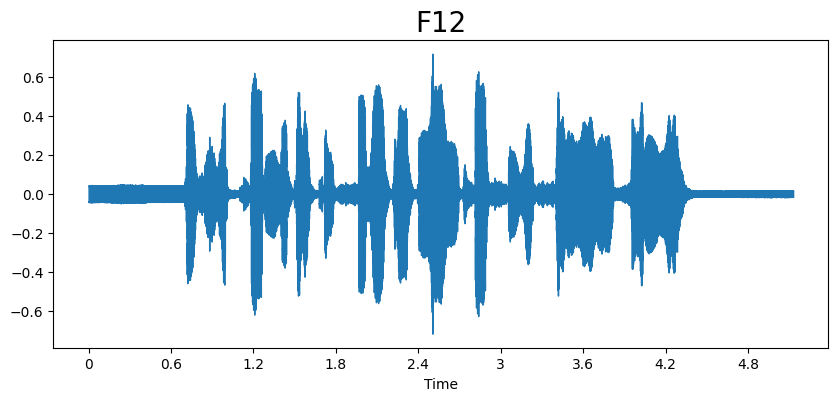

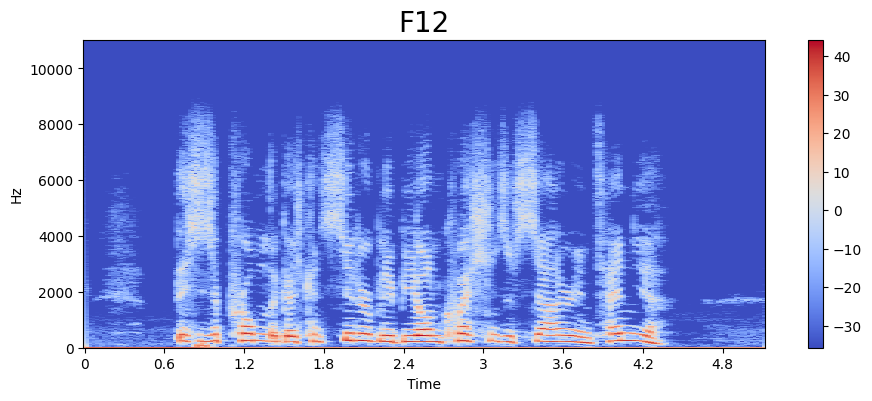

In [23]:
emotion = 'f12'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

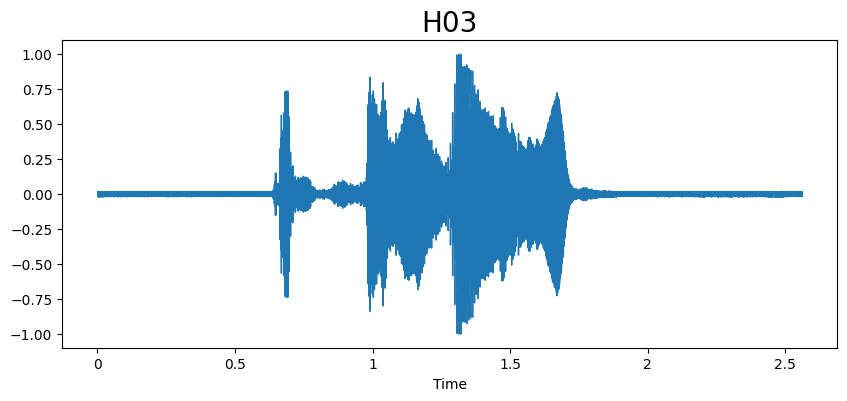

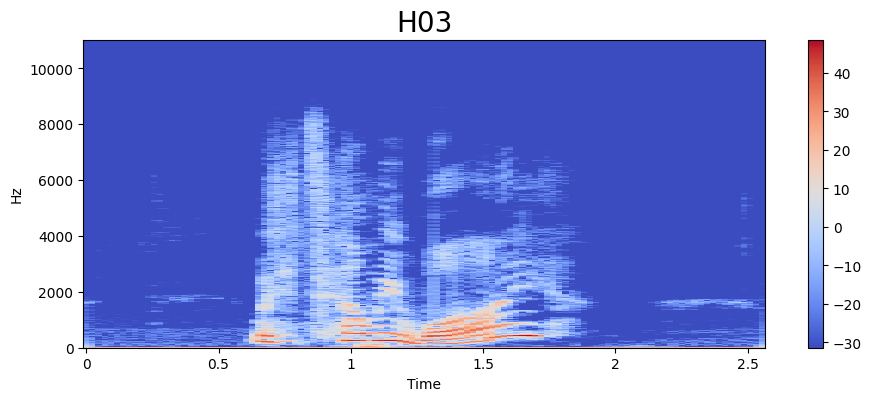

In [24]:
emotion = 'h03'
path = np.array(df['speech'][df['label']==emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

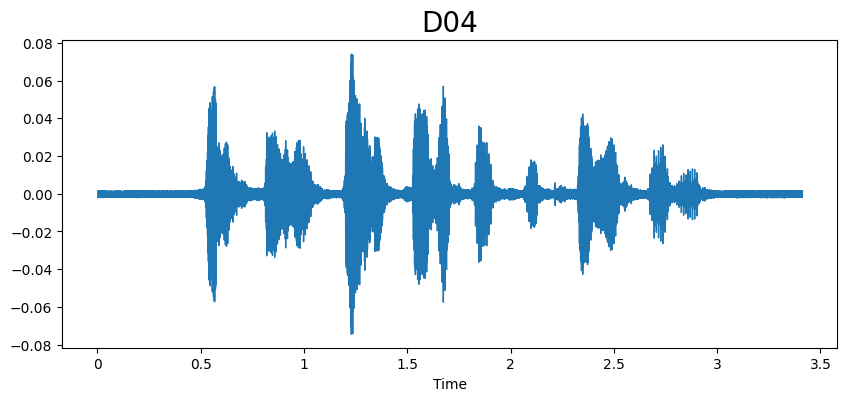

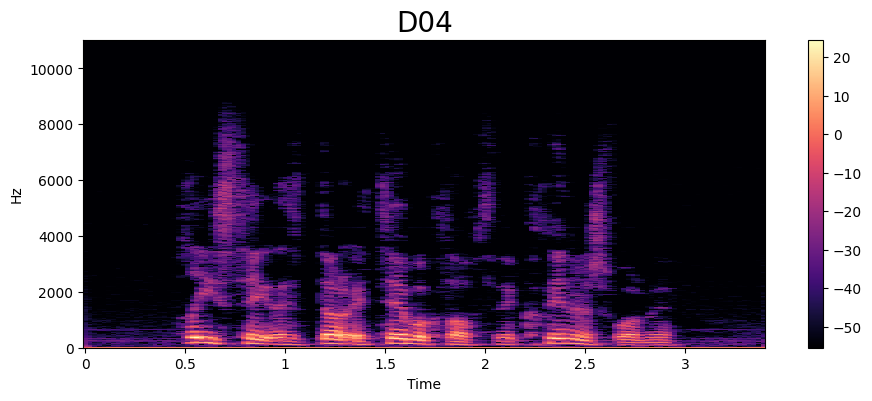

In [17]:
emotion = 'd04'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

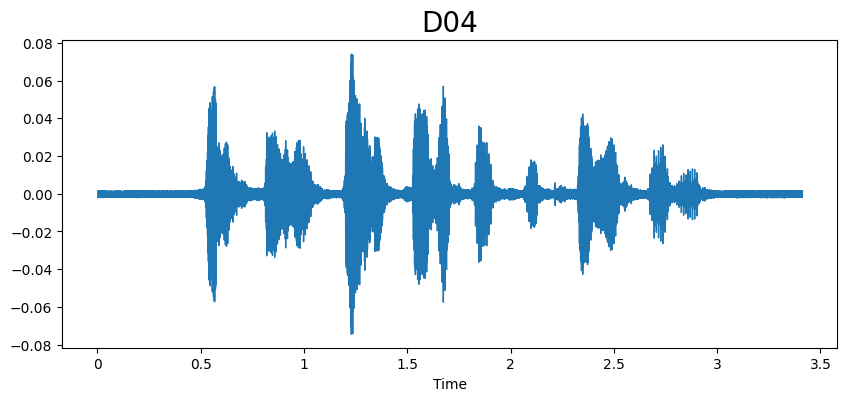

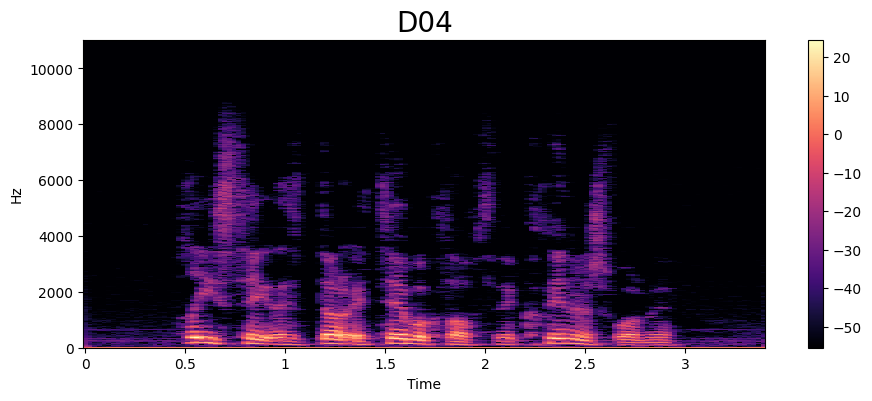

In [25]:
emotion = 'd04'

if len(df['speech'][df['label'] == emotion]) > 3:
    path = np.array(df['speech'][df['label'] == emotion])[3]
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
    display(Audio(path))
else:
    print(f"Not enough files for the emotion label '{emotion}'")

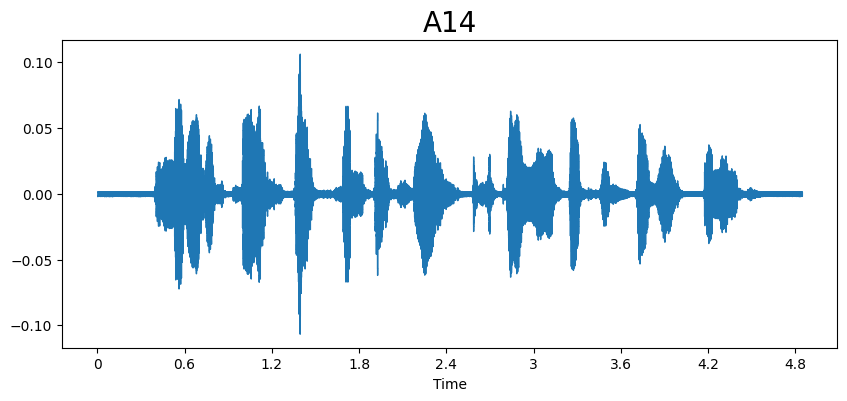

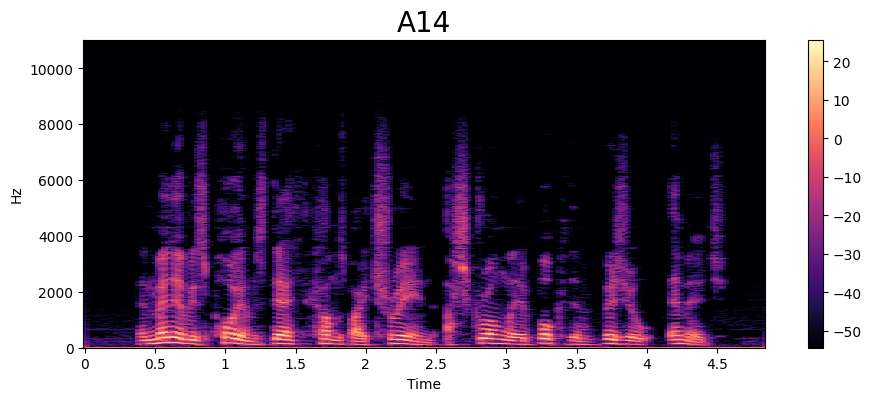

In [26]:
emotion = 'a14'
if len(df['speech'][df['label'] == emotion]) > 0:
    path = np.array(df['speech'][df['label'] == emotion])[0]
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
    display(Audio(path))
else:
    print(f"Not enough files for the emotion label '{emotion}'")

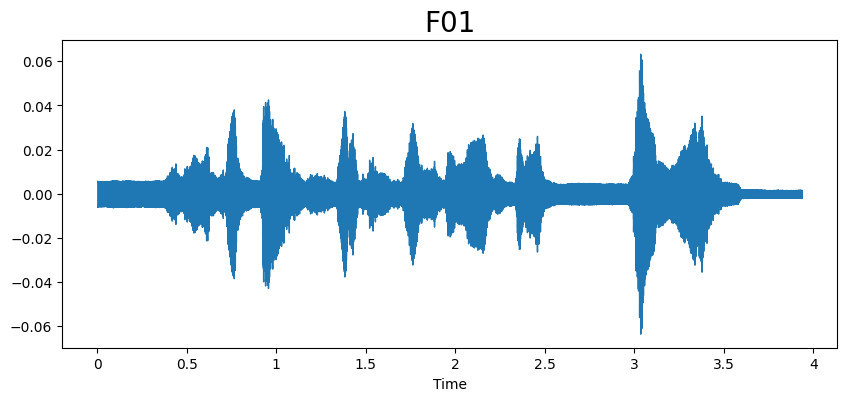

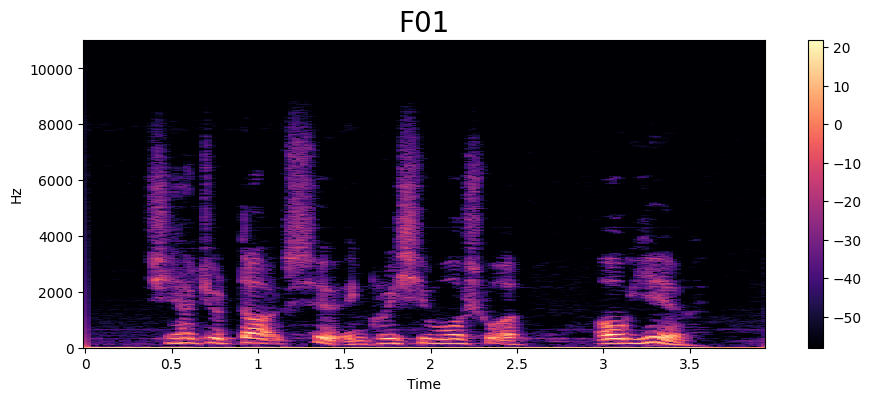

In [27]:
emotion = 'f01'
if len(df['speech'][df['label'] == emotion]) > 2:
    path = np.array(df['speech'][df['label'] == emotion])[2]
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
    display(Audio(path))
else:
    print(f"Not enough files for the emotion label '{emotion}'")

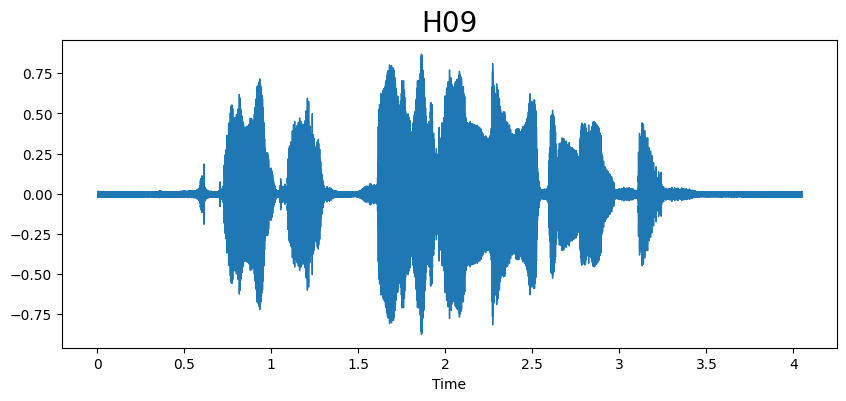

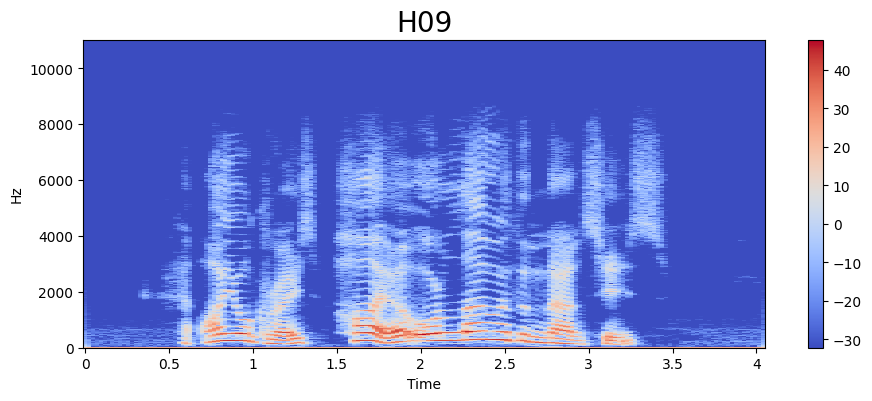

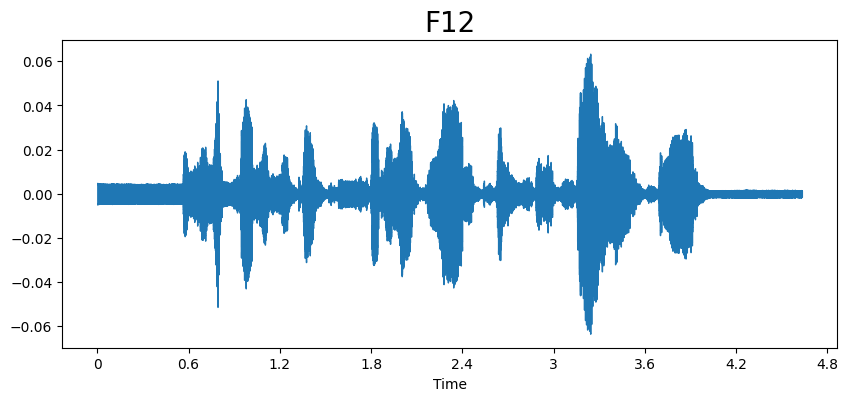

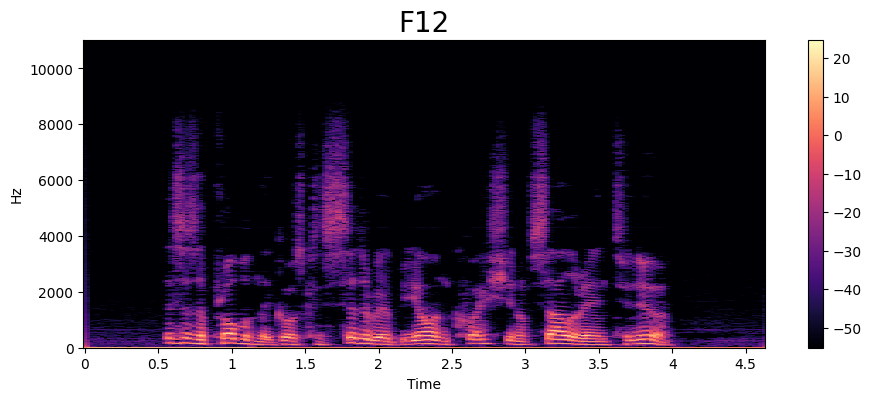

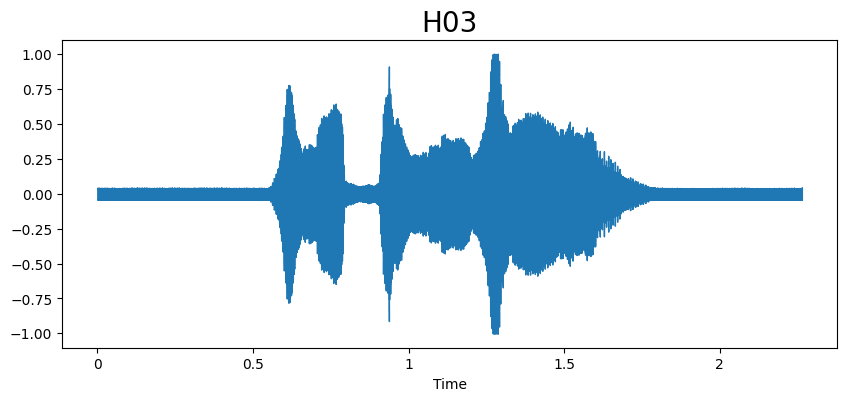

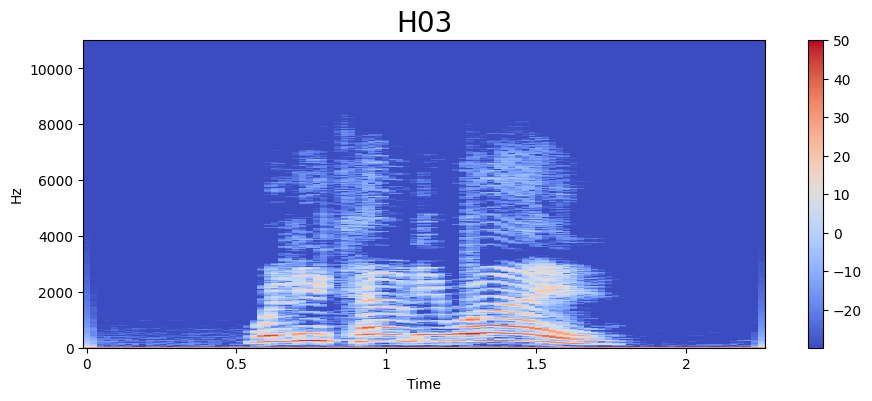

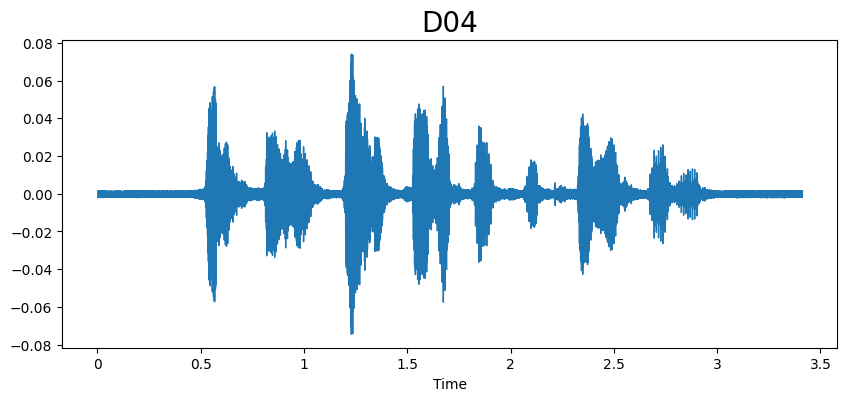

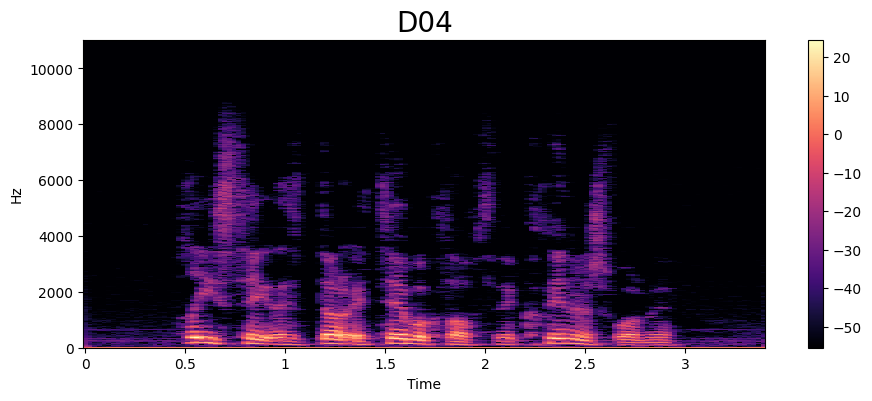

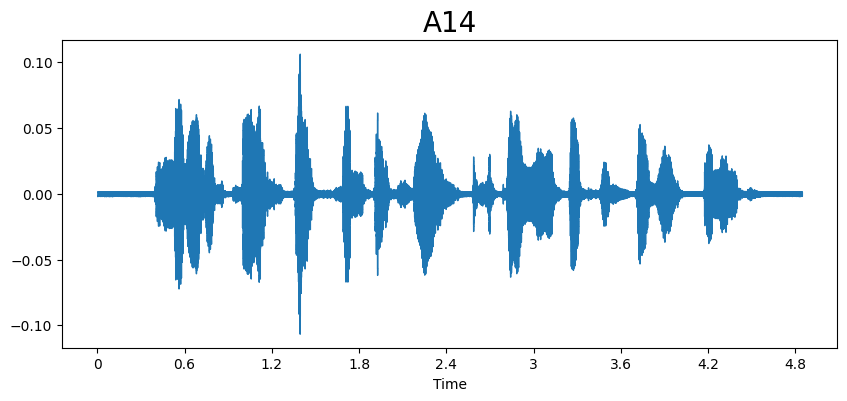

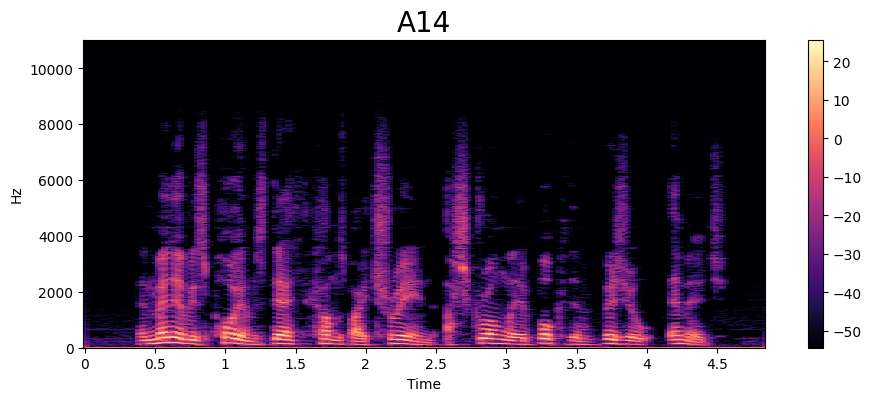

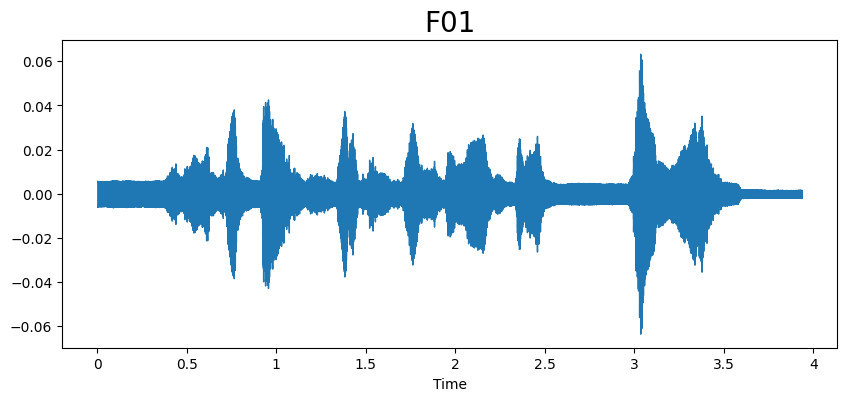

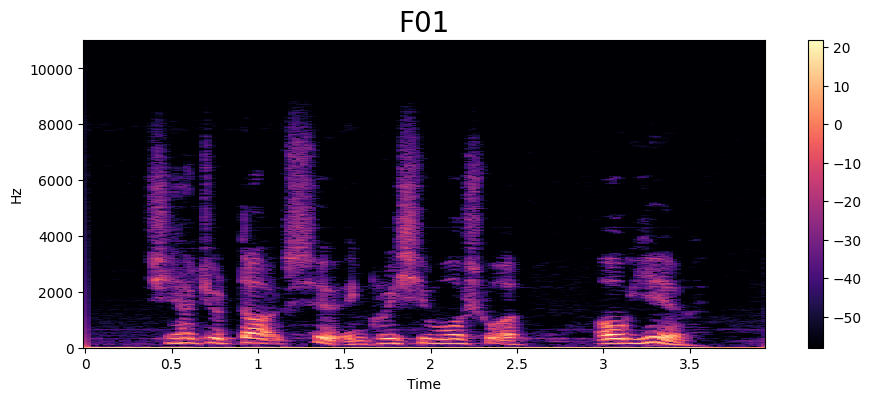

In [28]:
emotions_to_plot = {
    'h09': 0,
    'f12': 0,
    'h03': 0,
    'd04': 3,
    'a14': 0,
    'f01': 2
}

# Loop through each emotion and index
for emotion, index in emotions_to_plot.items():
    if len(df['speech'][df['label'] == emotion]) > index:
        path = np.array(df['speech'][df['label'] == emotion])[index]
        data, sampling_rate = librosa.load(path)
        waveplot(data, sampling_rate, emotion)
        spectrogram(data, sampling_rate, emotion)
        display(Audio(path))
    else:
        print(f"Not enough files for the emotion label '{emotion}' at index {index}")

**Explaoratory Analysis**

In [30]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [31]:
X_mfcc = df['speech'].apply(extract_mfcc)
X_mfcc

0        [-279.52878, 119.52984, 9.49082, 29.06638, -17...
1        [-551.75195, 142.6986, 29.528126, 35.493782, -...
2        [-312.72452, 104.94343, -0.10860097, 21.7445, ...
3        [-353.20938, 125.2113, 21.365974, 54.305614, 2...
4        [-505.12885, 144.70926, 2.1966057, 36.198933, ...
                               ...                        
12157    [-374.3952, 60.864998, 0.02505877, 8.431058, -...
12158    [-313.96478, 39.847843, -5.6493053, -3.8675754...
12159    [-357.54886, 77.88605, -15.224756, 2.194633, -...
12160    [-353.1474, 101.68391, -14.175897, -12.037376,...
12161    [-389.4595, 54.042767, 1.3469982, -1.4258989, ...
Name: speech, Length: 12162, dtype: object

In [32]:
extract_mfcc(df['speech'][0])

array([-2.7952878e+02,  1.1952984e+02,  9.4908199e+00,  2.9066380e+01,
       -1.7678970e+01,  2.8347778e-01, -2.3800997e+01, -7.6186929e+00,
       -1.6705067e+01, -4.1576982e+00,  1.3162577e+00, -9.6261177e+00,
       -6.7489260e-01, -8.7934141e+00,  3.9259133e+00, -3.7171786e+00,
       -5.9178619e+00,  4.2173374e-01, -1.1111561e+01, -7.2422581e+00,
        1.5490499e-01, -6.4975162e+00, -2.1789830e+00,  1.6070120e+00,
        3.4454463e+00,  6.5068250e+00,  5.8785362e+00,  3.9232886e+00,
        1.9337196e+00,  3.9872394e+00, -4.3511686e-01, -1.0470401e+00,
        7.2454983e-01,  1.5873417e+00,  2.3884771e+00,  1.4129392e+00,
        1.8114518e+00,  2.6157949e+00,  4.2810445e+00,  4.1986384e+00],
      dtype=float32)

In [33]:
X = np.array([x for x in X_mfcc])
X = np.expand_dims(X, -1)  # Add a single channel dimension for CNN input

print(f"X shape: {X.shape}")

X shape: (12162, 40, 1)


In [34]:
## input split
X = np.expand_dims(X, -1)
X.shape

(12162, 40, 1, 1)

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Convert to one-hot encoding
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(y.reshape(-1, 1))

print(f"y shape: {y.shape}")

y shape: (12162, 1572)


In [36]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (9729, 40, 1, 1), y_train shape: (9729, 1572)
X_test shape: (2433, 40, 1, 1), y_test shape: (2433, 1572)


****Create a LSTM Model ****

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1572)           │       102,180 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,524 (1.55 MB)

 Trainable params: 407,524 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])


Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.3894 - loss: 4.5378 - val_accuracy: 0.5612 - val_loss: 2.5110
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.5507 - loss: 2.4584 - val_accuracy: 0.6202 - val_loss: 2.1278
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.6011 - loss: 2.1028 - val_accuracy: 0.6706 - val_loss: 1.9381
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.6395 - loss: 1.8896 - val_accuracy: 0.6819 - val_loss: 1.9114
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.6458 - loss: 1.8415 - val_accuracy: 0.6860 - val_loss: 1.9226
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.6613 - loss: 1.7620 - val_accuracy: 0.7055 - val_loss: 1.8467
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.6863 - loss: 1.6223 - val_accuracy: 0.7189 - val_loss: 1.8253
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.6983 - loss: 1

In [39]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7171 - loss: 1.8838
Test Accuracy: 72.71%


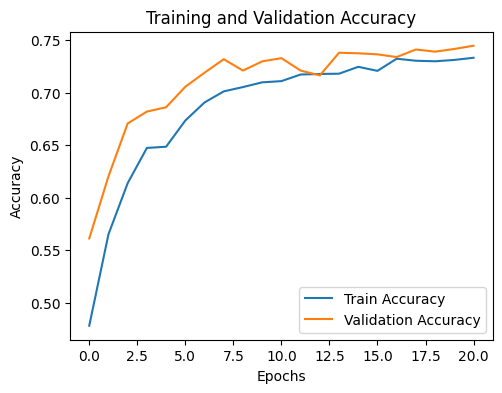

In [40]:
# Plot training history
epochs = range(len(history.history['accuracy']))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

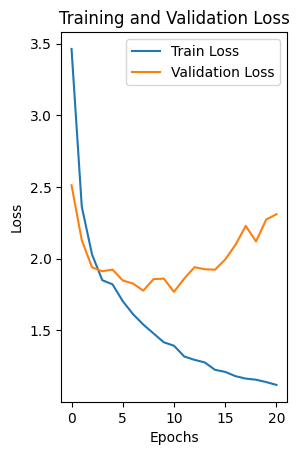

In [41]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**Another Approach**